<a href="https://colab.research.google.com/github/guilhermelaviola/MinimumWage/blob/main/MinimumWageBrazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-1-9ec223f05a52>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Mounted at /content/drive


In [2]:
# Setting the search parameters:
filename = 'minimum-wage-br.xlsx'
search_path = '/content/drive/My Drive/Datasets/Finances'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read.excel(file)

# **Basic information of the dataset**

In [3]:
# Importing the dataset and displying the last 10 rows:
df = pd.ExcelFile(file)
wage = pd.read_excel(df, 'minimum-wage')
wage.tail()

,Month/Year,Dolar exchange rate,Minimum wage
461,2024-01-06,5.1423,1412.0
462,2024-01-07,5.363,1412.0
463,2024-01-08,5.4563,1412.0
464,2024-01-09,5.4651,1412.0
465,2024-01-10,5.5717,1412.0


In [4]:
# Displaying the number of rows and columns in the dataset:
wage.shape

(466, 3)

In [5]:
# Displaying the datatypes of each column:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month/Year           466 non-null    datetime64[ns]
 1   Dolar exchange rate  466 non-null    object        
 2   Minimum wage         364 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.0+ KB


In [6]:
# Displaying statistical data of the numerical data present in the dataset:
wage.describe()

,Month/Year,Minimum wage
count,466,364.000000
mean,2004-12-07 07:28:04.120171648,558.465879
min,1986-01-01 00:00:00,64.790000
25%,1995-01-09 06:00:00,180.000000
50%,2005-01-05 12:00:00,465.000000
75%,2015-01-01 18:00:00,937.000000
max,2024-01-10 00:00:00,1412.000000
std,NaN,397.964038


# **Basic column data plotting**

In [7]:
# Filtering the wages to display the records that were registered after 06/1994:
wages_filtered = wage[(wage['Month/Year'] > '1994-09-01')]



In [8]:
# Displaying the number of rows and columns in the filtered dataset:
wages_filtered.shape

(358, 3)

In [10]:
# Displaying the datatypes of each column in the filtered dataset:
wages_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 108 to 465
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month/Year           358 non-null    datetime64[ns]
 1   Dolar exchange rate  358 non-null    object        
 2   Minimum wage         358 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.2+ KB


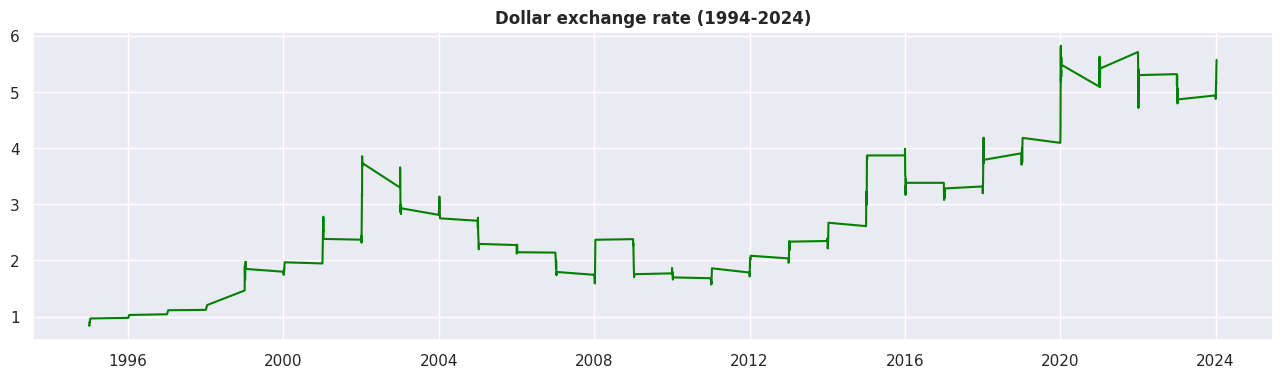

In [11]:
# Displaying the US Dollar exchange rate variation in Brazil between 1994 and 2024:
plt.figure(figsize = (16, 4))
plt.title('Dollar exchange rate (1994-2024)', fontweight = 'bold')
plt.plot(wages_filtered['Month/Year'], wages_filtered['Dolar exchange rate'], color = 'green')
plt.show()

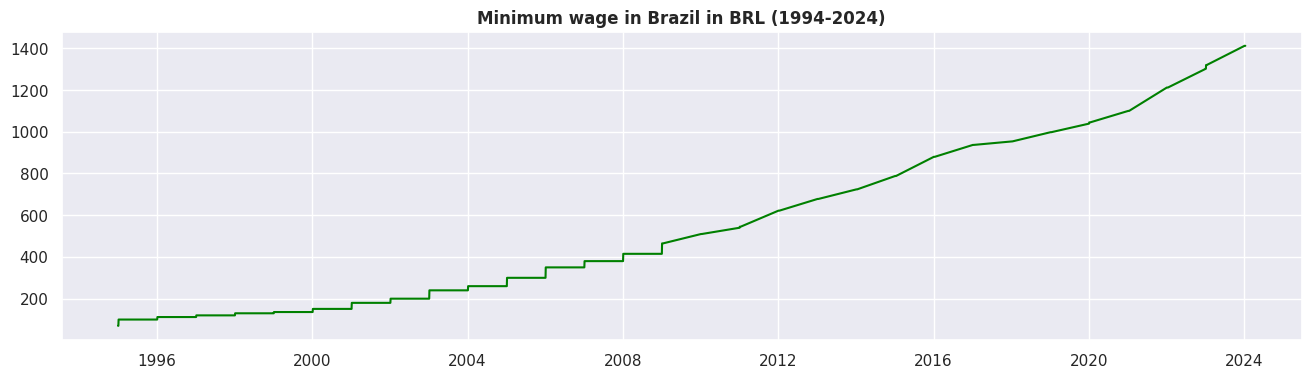

In [13]:
# Displaying the the brazilian minimum wage variation in Brazilian Reais (BRL) between 1994 and 2024:
plt.figure(figsize = (16, 4))
plt.title('Minimum wage in Brazil in BRL (1994-2024)', fontweight = 'bold')
plt.plot(wages_filtered['Month/Year'], wages_filtered['Minimum wage'], color = 'green')
plt.show()

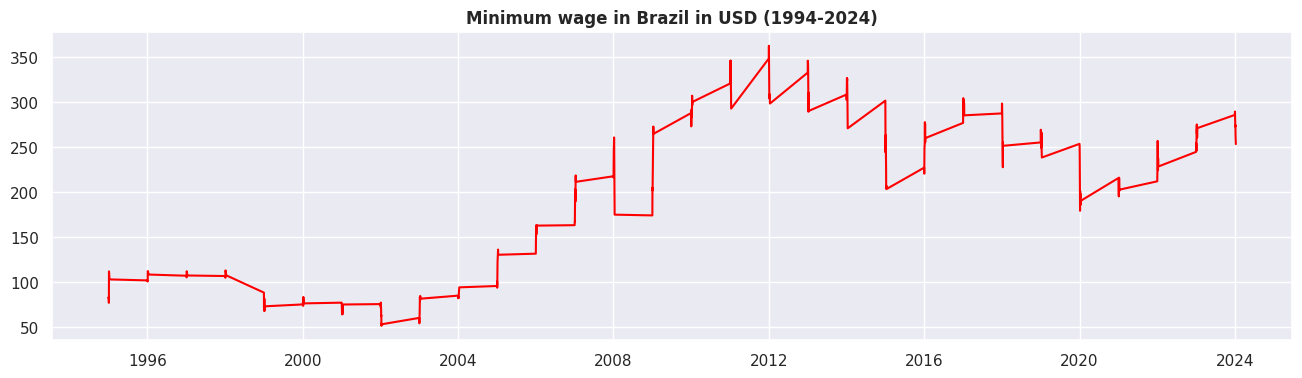

In [21]:
# Displaying the the brazilian minimum wage variation in US Dollars (USD) between 1994 and 2024:
wage_in_dollars = wages_filtered['Minimum wage'] / wages_filtered['Dolar exchange rate']
plt.figure(figsize = (16, 4))
plt.title('Minimum wage in Brazil in USD (1994-2024)', fontweight = 'bold')
plt.plot(wages_filtered['Month/Year'], wage_in_dollars, color = 'red')
plt.show()

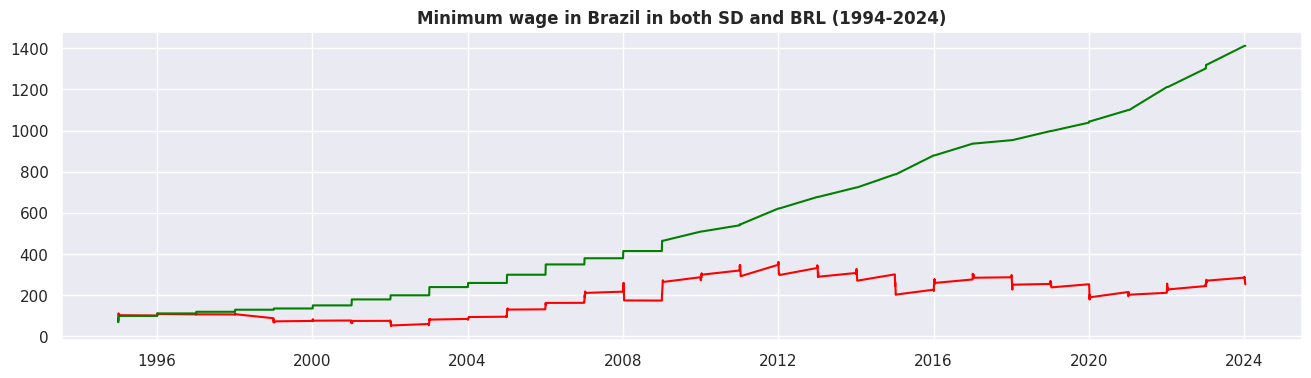

In [22]:
# Displaying the the brazilian minimum wage variation (inboth USD and BRL) between 1994 and 2024:
plt.figure(figsize = (16, 4))
plt.title('Minimum wage in Brazil in both SD and BRL (1994-2024)', fontweight = 'bold')
plt.plot(wages_filtered['Month/Year'], wage_in_dollars, color = 'red')
plt.plot(wages_filtered['Month/Year'], wages_filtered['Minimum wage'], color = 'green')
plt.show()